# KMeans

In [1]:
import pandas as pd

home_data = pd.read_csv('../data/housing.csv', usecols = ['longitude', 'latitude', 'median_house_value'])
home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


### Visualize the data

<Axes: xlabel='longitude', ylabel='latitude'>

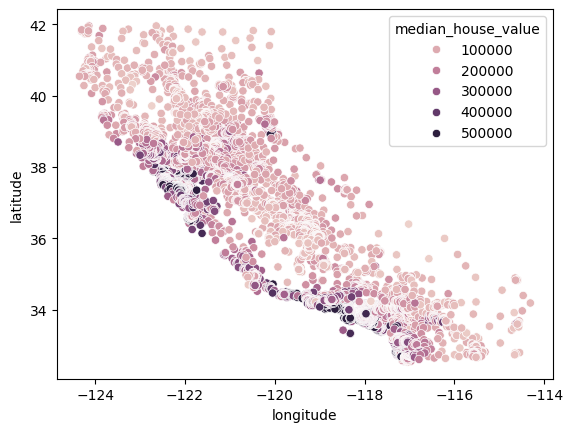

In [2]:
import seaborn as sns

sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')

### Normalizing the Data

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size=0.33, random_state=0)

In [4]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

### Fitting and Evaluating the Model

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

<Axes: xlabel='longitude', ylabel='latitude'>

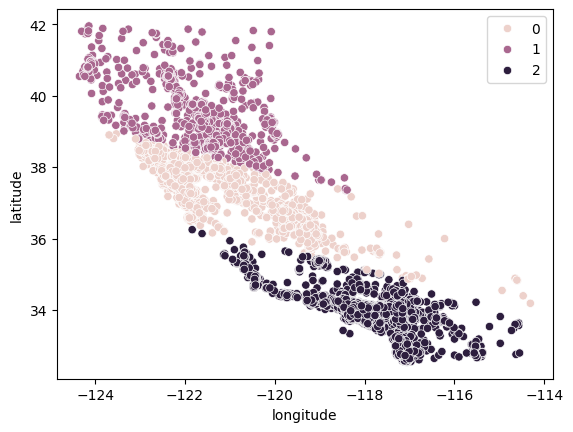

In [9]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

<Axes: ylabel='median_house_value'>

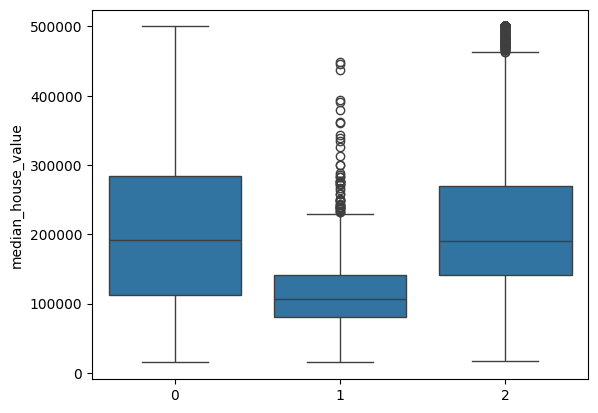

In [10]:
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'])

In [11]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

np.float64(0.7499371920917443)

### Chosing the best numbers of clusters

In [12]:
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

We can then first visually look at a few different values of K.

First we look at `k=2`

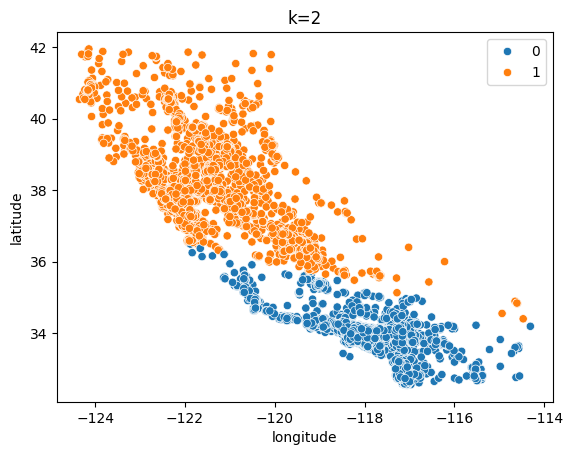

In [22]:
import matplotlib.pyplot as plt
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[0].labels_)
plt.title("k=2")
plt.show()

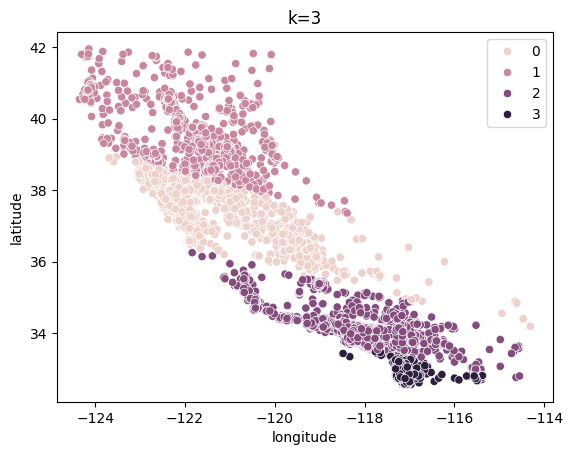

In [25]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[2].labels_)
plt.title("k=3")
plt.show()

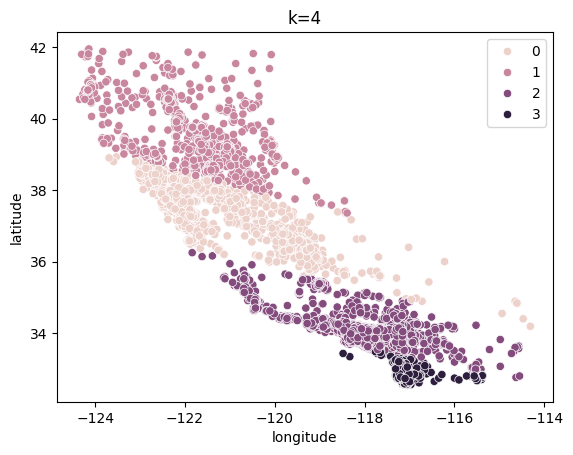

In [26]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[2].labels_)
plt.title("k=4")
plt.show()

The above graph appears to have too many clusters. we have sacrifice easy interpretation of the clusters for a "more accurate" geo-clustering result.

Typically, as we increasing the value of `K`, we see improvements in clusters and what they represent until a certain point. We then start to see diminishing returns or even worse performance. We can visually see this to help make a decision on the value of `k` by using an elbow plot where the `y-axis` is a measure of goodnees of fit the `x-axis` in the value of k.

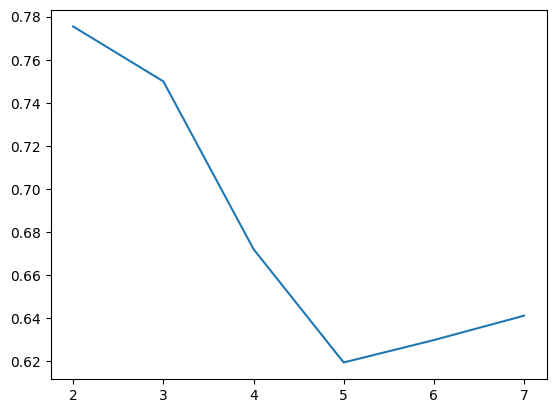

In [28]:
sns.lineplot(x = K, y = score)
plt.show()

We tipically choose the point where the improvements in performance start to flatten or get worse. We seek `k=5` is probably the best we can do without overfitting.

We can alse see that the clusters do a relatively good job of breaking California into distinct clusters and these clusters map relatively well to different price ranges as seen below.

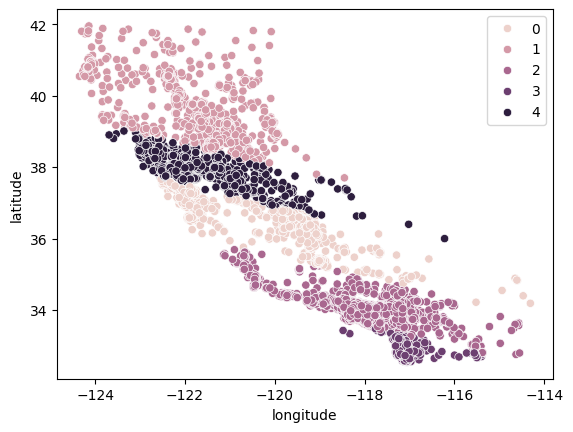

In [30]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[3].labels_)
plt.show()

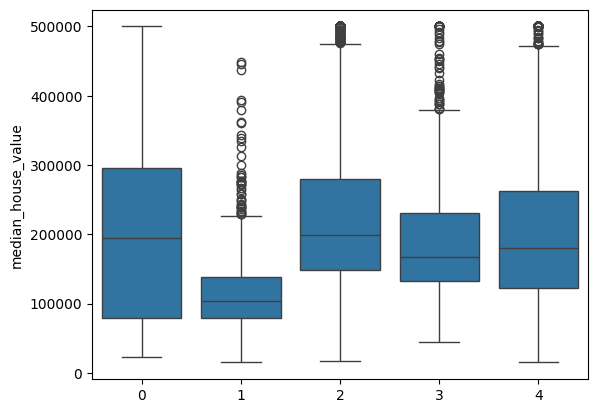

In [31]:
sns.boxplot(x = fits[3].labels_, y = y_train['median_house_value'])
plt.show()